In [1]:
import sys
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import torch as pt
sys.path.append("/home/spin_se/Software/flowtorch")
import flowtorch
from flowtorch.data import TAUSurfaceDataloader
from flowtorch import DATASETS

Refer to the installation instructions at https://github.com/FlowModelingControl/flowtorch
If you are not using the TecplotDataloader, ignore this warning.


In [2]:
path_ds = DATASETS["tau_surface_import"]
file_name = "tau_euler.para"
loader = TAUSurfaceDataloader(join(path_ds,file_name))
loader._para._config["bmap_file"]

'(thisfile)'

In [3]:
loader.zone_names

['WingUpper', 'WingLower', 'WingTE', 'WingTipRight', 'WingTipLeft']

In [4]:
loader.zone = 'WingUpper'
loader.zone

'WingUpper'

In [5]:
vertices = loader.vertices
times = loader.write_times

In [6]:
loader.field_names[times[0]]

['global_id',
 'x',
 'y',
 'z',
 'x_velocity',
 'y_velocity',
 'z_velocity',
 'cp',
 'cf',
 'yplus']

In [7]:
time=times[0]
with Dataset(loader._file_name(time,"")) as data:
    for key in data.variables.keys():
        print(data[key].shape)

(165,)
(165,)
(165,)
(165,)
(165,)
(165,)
(165,)
(165,)
(165,)
(165,)


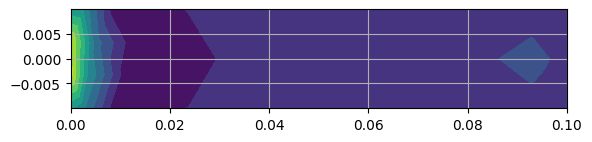

In [8]:
import matplotlib.tri as mtri
x=vertices[:,0]
y=vertices[:,1]
z=vertices[:,2]
cp=loader.load_snapshot("cp", times[9])
triang = mtri.Triangulation(x,y)
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
ax.grid(True)
#ax.tricontour(triang, cp, levels=10, linewidths=0.5, colors='k')
cbar = ax.tricontourf(triang, cp, levels=10, cmap='viridis')
#plt.colorbar(cbar)
plt.show()

In [9]:
loader._global_id_of_zone_points[loader.zone]

array([  0,   1,   2,   3,   4,   5,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82, 147, 148, 149, 150, 151, 152,
       153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164])

In [10]:
loader._para._parse_bmap()
loader._para._bmap

{'WingUpper': [1, 7],
 'WingLower': [2],
 'WingTE': [3],
 'WingTipRight': [4],
 'WingTipLeft': [5]}

In [11]:
for zname, marker in loader._para._bmap.items():
    print(zname, marker)

WingUpper [1, 7]
WingLower [2]
WingTE [3]
WingTipRight [4]
WingTipLeft [5]


In [12]:
loader._para._bmap.keys()

dict_keys(['WingUpper', 'WingLower', 'WingTE', 'WingTipRight', 'WingTipLeft'])

In [13]:
loader.vertices

tensor([[ 1.0000e-01,  1.0000e-02,  1.0000e-03],
        [ 1.0000e-01, -1.0000e-02,  1.0000e-03],
        [ 5.0586e-02, -1.0000e-02,  8.9440e-03],
        [ 0.0000e+00, -1.0000e-02,  0.0000e+00],
        [ 0.0000e+00,  1.0000e-02,  0.0000e+00],
        [ 5.0586e-02,  1.0000e-02,  8.9440e-03],
        [ 1.0000e-01,  5.0000e-03,  1.0000e-03],
        [ 1.0000e-01,  0.0000e+00,  1.0000e-03],
        [ 1.0000e-01, -5.0000e-03,  1.0000e-03],
        [ 9.2962e-02, -1.0000e-02,  2.2688e-03],
        [ 8.5921e-02, -1.0000e-02,  3.5216e-03],
        [ 7.8877e-02, -1.0000e-02,  4.7527e-03],
        [ 7.1826e-02, -1.0000e-02,  5.9508e-03],
        [ 6.4766e-02, -1.0000e-02,  7.0916e-03],
        [ 5.7690e-02, -1.0000e-02,  8.1212e-03],
        [ 0.0000e+00, -3.3332e-03,  0.0000e+00],
        [ 0.0000e+00,  3.3335e-03,  0.0000e+00],
        [ 2.6320e-03,  1.0000e-02,  5.6790e-03],
        [ 8.5084e-03,  1.0000e-02,  8.4528e-03],
        [ 1.5653e-02,  1.0000e-02,  9.6854e-03],
        [ 2.4272e-02